**Jose Miguel Acuña Hernandez**

**jacunah@unal.edu.co**

En este documento dejo explicito los resultados del anáisis de datos realizado a la base de datos *8. Respuestas Acoso Escoral.xlsx - Respuestas de formulario.csv*

#  Librerias, llamado de base de datos y filtrado de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Datos = pd.read_pickle('Datos.pkl').drop(columns=['Colegio', 'Grupo familiar'])

In [3]:
Datos_por_género = Datos.copy().groupby('Género').sum().reset_index()
Datos_por_género = Datos_por_género[Datos_por_género['Género'] != 'Prefiero no decirlo']

In [4]:
Datos_relativos = Datos_por_género.copy()
Datos_relativos['Reportes de abuso físico por estudiante'] = Datos_relativos['Reportes de abuso físico'] / Datos_relativos['Cantidad de estudiantes']
Datos_relativos['Reportes de abuso psicológico por estudiante'] = Datos_relativos['Reportes de abuso psicológico'] / Datos_relativos['Cantidad de estudiantes']
Datos_relativos['Reportes de ciberbullying por estudiante'] = Datos_relativos['Reportes de ciberbullying'] / Datos_relativos['Cantidad de estudiantes']

Datos_relativos['Porcentaje victimas de abuso físico'] = Datos_relativos['Victimas de abuso físico'] / Datos_relativos['Cantidad de estudiantes']*100
Datos_relativos['Porcentaje victimas de abuso psicológico'] = Datos_relativos['Victimas de abuso psicológico'] / Datos_relativos['Cantidad de estudiantes']*100
Datos_relativos['Porcentaje victimas de ciberbullying'] = Datos_relativos['Victimas de ciberbullying'] / Datos_relativos['Cantidad de estudiantes']*100

Datos_relativos.drop(columns=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying', 'Cantidad de estudiantes', 'Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], inplace=True)
Datos_por_género

,Género,Reportes de abuso físico,Reportes de abuso psicológico,Reportes de ciberbullying,Cantidad de estudiantes,Victimas de abuso físico,Victimas de abuso psicológico,Victimas de ciberbullying
0,Femenino,326.0,625.0,172,195,90,115,65
1,Masculino,182.0,341.0,73,137,57,72,25


# Hombres

In [5]:
Masculino = Datos_por_género.copy()[Datos_por_género['Género'] == 'Masculino']
print("En los hombres se reportan", Masculino['Reportes de abuso físico'].values[0], "casos de abuso físico, ", Masculino['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", Masculino['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En los hombres se reportan 182.0 casos de abuso físico,  341.0 casos de abuso psicológico y  73 casos de ciberbullying.


In [6]:
Masculino_relativos = Datos_relativos.copy()[Datos_relativos['Género'] == 'Masculino']
print("En los hombres el ", Masculino_relativos['Porcentaje victimas de abuso físico'].values[0], "% de los estudiantes reportan ser víctimas de abuso físico, el ", Masculino_relativos['Porcentaje victimas de abuso psicológico'].values[0], "% de abuso psicológico y el ", Masculino_relativos['Porcentaje victimas de ciberbullying'].values[0], "% de ciberbullying.")
print("En los hombres se reportan ", Masculino_relativos['Reportes de abuso físico por estudiante'].values[0], "casos de abuso físico por estudiante, ", Masculino_relativos['Reportes de abuso psicológico por estudiante'].values[0], "casos de abuso psicológico por estudiante y ", Masculino_relativos['Reportes de ciberbullying por estudiante'].values[0], "casos de ciberbullying por estudiante.")

En los hombres el  41.605839416058394 % de los estudiantes reportan ser víctimas de abuso físico, el  52.55474452554745 % de abuso psicológico y el  18.248175182481752 % de ciberbullying.
En los hombres se reportan  1.3284671532846715 casos de abuso físico por estudiante,  2.489051094890511 casos de abuso psicológico por estudiante y  0.5328467153284672 casos de ciberbullying por estudiante.


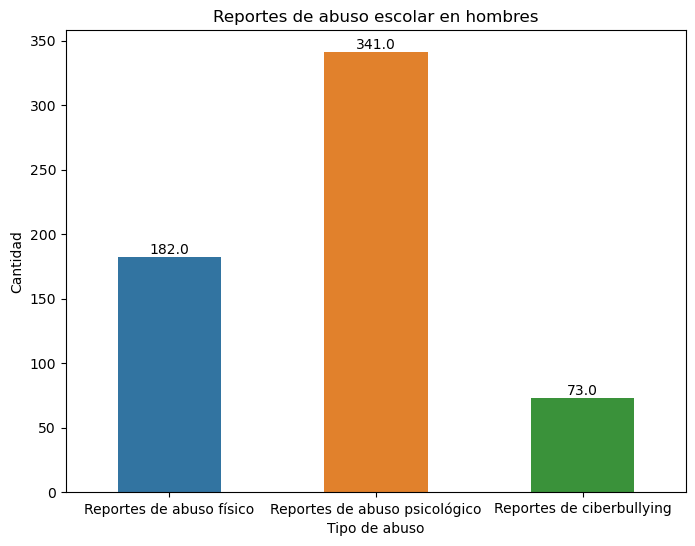

In [7]:
sumas_abusos = Masculino[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso escolar en hombres')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad')
plt.show()

# Mujeres

In [8]:
Femenino = Datos_por_género.copy()[Datos_por_género['Género'] == 'Femenino']
print("En las mujeres se reportan", Femenino['Reportes de abuso físico'].values[0], "casos de abuso físico, ", Femenino['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", Femenino['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

En las mujeres se reportan 326.0 casos de abuso físico,  625.0 casos de abuso psicológico y  172 casos de ciberbullying.


In [9]:
Femenino_relativos = Datos_relativos.copy()[Datos_relativos['Género'] == 'Femenino']
print("En las mujeres el ", Femenino_relativos['Porcentaje victimas de abuso físico'].values[0], "% de los estudiantes reportan ser víctimas de abuso físico, el ", Femenino_relativos['Porcentaje victimas de abuso psicológico'].values[0], "% de abuso psicológico y el ", Femenino_relativos['Porcentaje victimas de ciberbullying'].values[0], "% de ciberbullying.")
print("En las mujeres se reportan ", Femenino_relativos['Reportes de abuso físico por estudiante'].values[0], "casos de abuso físico por estudiante, ", Femenino_relativos['Reportes de abuso psicológico por estudiante'].values[0], "casos de abuso psicológico por estudiante y ", Femenino_relativos['Reportes de ciberbullying por estudiante'].values[0], "casos de ciberbullying por estudiante.")

En las mujeres el  46.15384615384615 % de los estudiantes reportan ser víctimas de abuso físico, el  58.97435897435898 % de abuso psicológico y el  33.33333333333333 % de ciberbullying.
En las mujeres se reportan  1.6717948717948719 casos de abuso físico por estudiante,  3.2051282051282053 casos de abuso psicológico por estudiante y  0.882051282051282 casos de ciberbullying por estudiante.


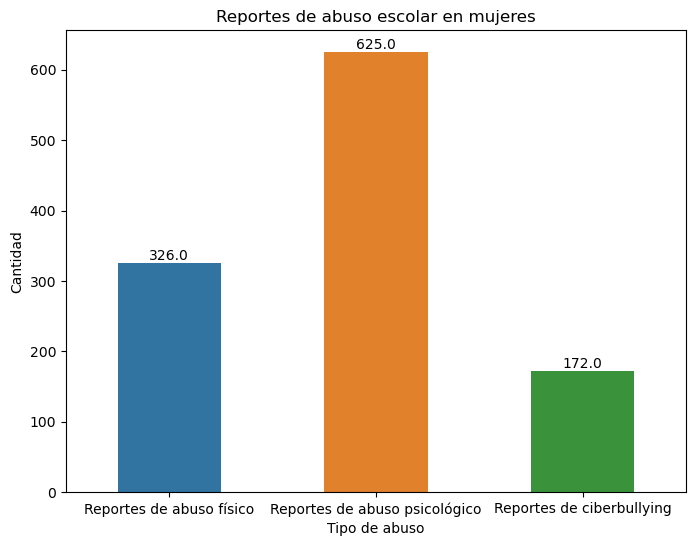

In [10]:
sumas_abusos = Femenino[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso escolar en mujeres')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad')
plt.show()

# Contraste

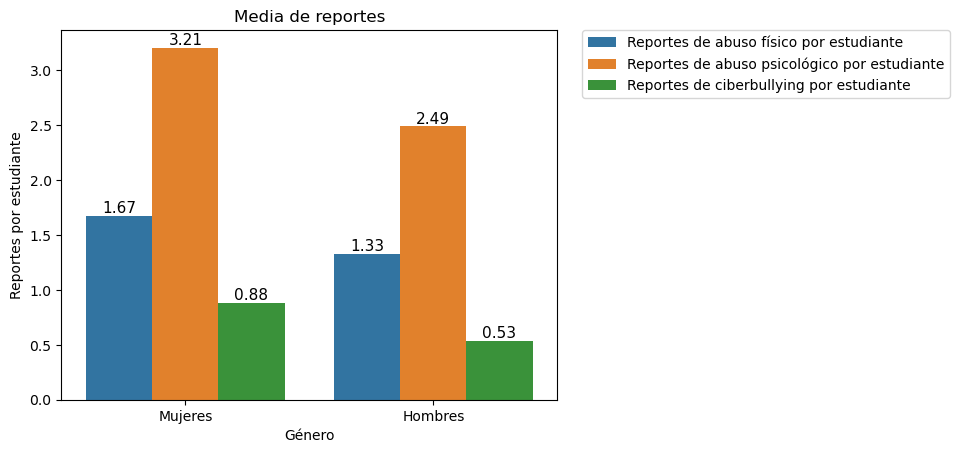

In [15]:
Datos_relativos_long = pd.melt(Datos_relativos, id_vars='Género', value_vars=['Reportes de abuso físico por estudiante', 'Reportes de abuso psicológico por estudiante', 'Reportes de ciberbullying por estudiante'], var_name='Tipo de abuso', value_name='Reportes por estudiante')
Datos_relativos_long['Género'] = Datos_relativos_long['Género'].replace({'Femenino': 'Mujeres', 'Masculino': 'Hombres'})

ax = sns.barplot(x='Género', y='Reportes por estudiante', hue='Tipo de abuso', data=Datos_relativos_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Media de reportes')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
    
plt.show()

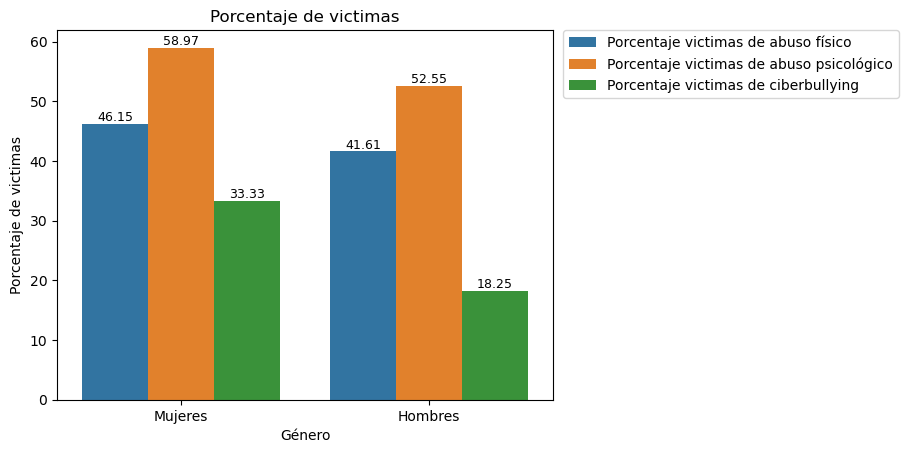

In [18]:
Datos_relativos_long = pd.melt(Datos_relativos, id_vars='Género', value_vars=['Porcentaje victimas de abuso físico', 'Porcentaje victimas de abuso psicológico', 'Porcentaje victimas de ciberbullying'], var_name='Tipo de abuso', value_name='Porcentaje de victimas')
Datos_relativos_long['Género'] = Datos_relativos_long['Género'].replace({'Femenino': 'Mujeres', 'Masculino': 'Hombres'})

ax = sns.barplot(x='Género', y='Porcentaje de victimas', hue='Tipo de abuso', data=Datos_relativos_long)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Porcentaje de victimas')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=9, color='black', ha='center', va='bottom')
    
plt.show()